## Demo for learning field dependent aberration from bead data

##### Setup environment

In [1]:
import sys
sys.path.append("..")
from psflearning.psflearninglib import psflearninglib
from psflearning import io
from psflearning.makeplots import *
import tensorflow as tf
gpus = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(gpus[0], True)

##### Create psflearning object and load the config file
$\small\color{skyblue}{\mathrm{basefile}}$: config file with all parameters  
$\small\color{skyblue}{\mathrm{sysfile}}$: config file with microscope specific parameters  
For advanced user, pass in base file only as below to interact with all parameters:   
```python
    L.param = io.param.combine('config_base')
```

In [138]:
L = psflearninglib()
L.param = io.param.combine('config_base',psftype='FD',channeltype='1ch',sysfile='SEQ')
#L.param = io.param.load('../config/config_zernike_FD.yaml').Params

##### Edit user defined parameters

In [139]:
L.param.datapath = r'Y:\Projects\DNA-PAINT\Data\TU-DELFT DNAP\Bead data 11-28-2023/'
L.param.savename = L.param.datapath + 'psfmodel'
L.param.keyword = 'zstack' # keyword for your data file
L.param.subfolder = 'zstack' # keyword for subfolder name if each data file is saved in a individual folder, set to '' if no subfolder
L.param.gain = 0.47
L.param.ccd_offset = 100
L.param.FOV.z_step = 1  
L.param.pixel_size.z = 0.1 # micron, equal to z_step*stepsize_of_the_data
L.param.roi.max_bead_number = 200 # lower this number if out of memory 
L.param.roi.peak_height = 0.02
L.param.batch_size = 100
L.param.option.model.symmetric_mag = False
L.param.loss_weight.smooth = 0.1
L.param.iteration=200
L.param.format = '.mat'
L.param.PSFtype = 'zernike_vector_FD'
L.param.option.model.division = 32
L.param.roi.roi_size = [21,21]
L.param.rej_threshold.mse = 2
L.param.swapxy = True
L.param.stage_mov_dir = 'reverse'

##### Start learning

In [140]:
images = L.load_data()
L.getpsfclass()
dataobj = L.prep_data(images)
psfobj,fitter = L.learn_psf(dataobj,time=0)
#loc_FD = L.localize_FD(fitter) # optional step, for validating each PSF model
resfile = L.save_result(psfobj,dataobj,fitter)

Y:\Projects\DNA-PAINT\Data\TU-DELFT DNAP\Bead data 11-28-2023\zstack1\zstack.mat
(1, 17, 1024, 1024)
rois shape channel : (46, 17, 21, 21)


3/6: learning: 385/? [06:55s]  1.08s/it, current loss: 1.17805, total time: 415.12s        
4/6: calculating spline coefficients: 1/1 [00:00s]  1.31it/s total time: 415.88s
5/6: localization: 4/4 [00:00s]  5.78it/s total time: 416.57s


outlier id: [ 6 39 43 44 45]
rois shape channel : (41, 17, 21, 21)


3/6: learning: 204/250 [03:45s]  1.10s/it, current loss: 1.07018, total time: 641.84s
4/6: calculating spline coefficients: 1/1 [00:00s]  1.32it/s total time: 642.59s
5/6: localization: 4/4 [00:00s]  5.93it/s total time: 643.26s
6/6: saving results: [00:00s] total time: 644.09s


##### Show results

In [141]:
f,p = io.h5.load(resfile) # load result file

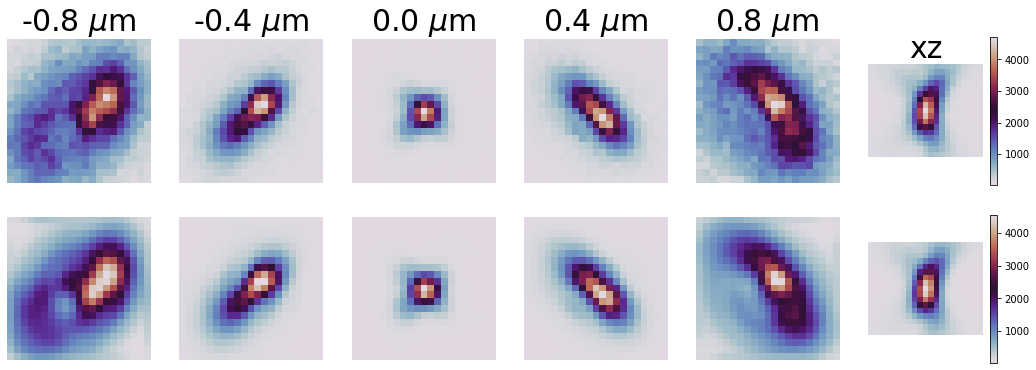

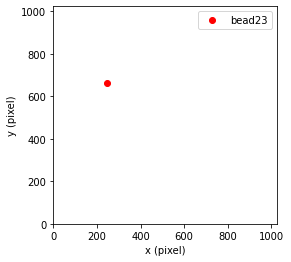

In [152]:
showpsfvsdata(f,p,index=23)

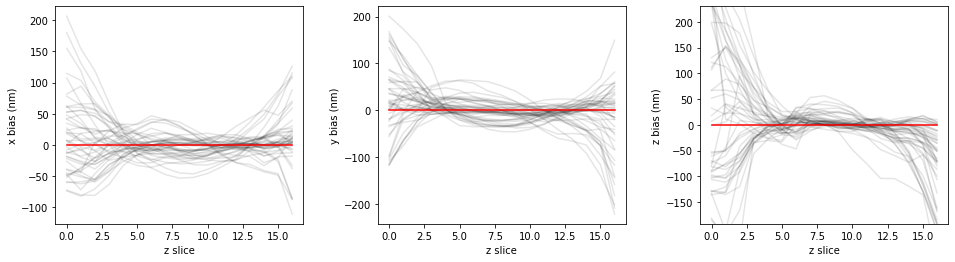

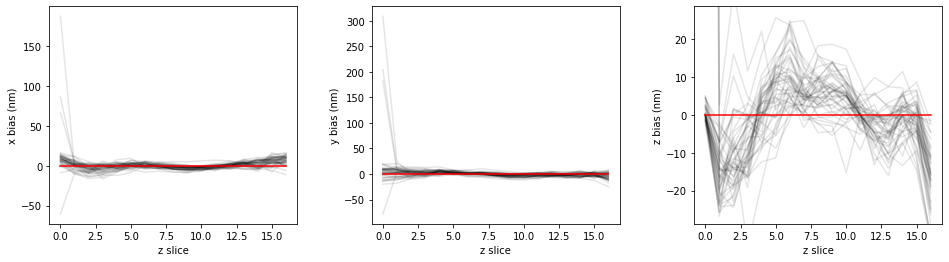

In [10]:
showlocalization(f,p)

##### Optional plots

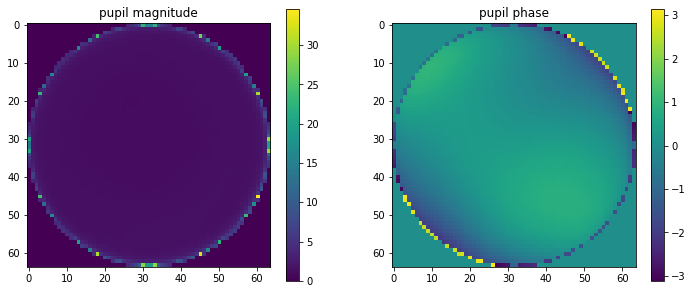

In [12]:
showpupil(f,p,index=30)

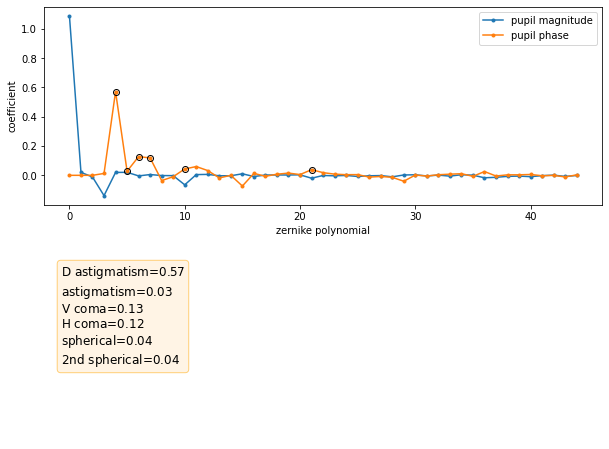

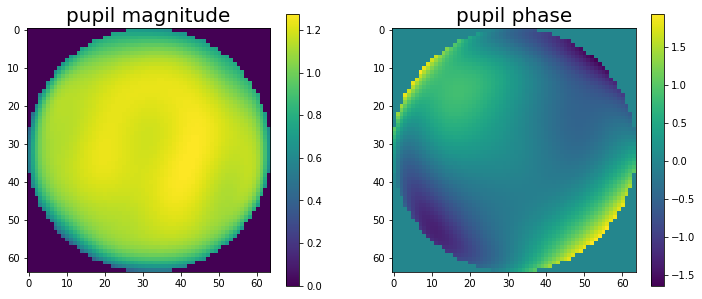

In [144]:
showzernike(f,p,index=10)

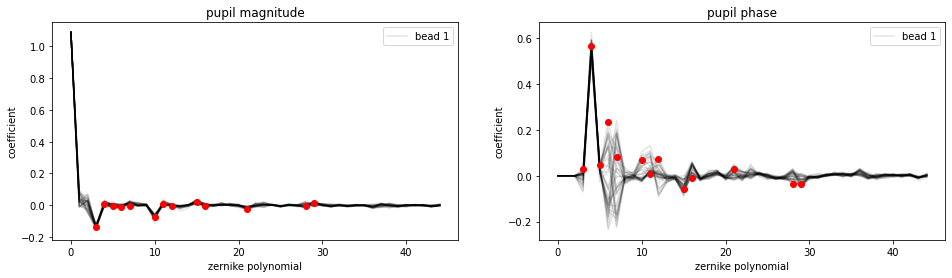

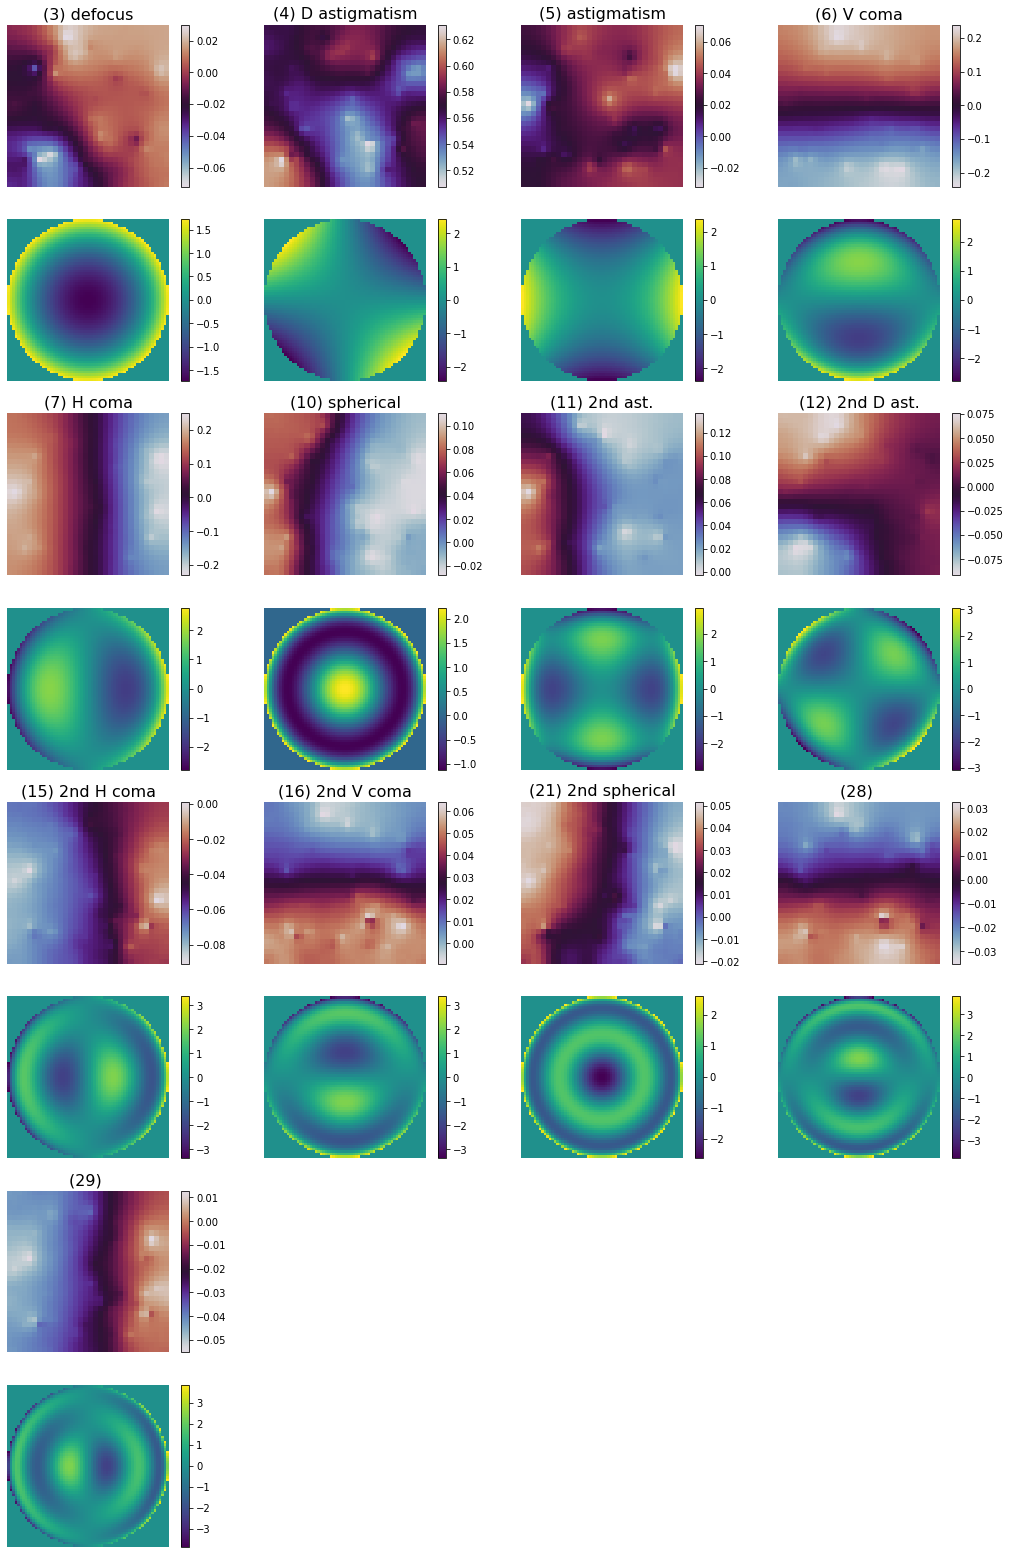

In [145]:
showzernikemap(f,p,index = [3,4,5,6,7,10,11,12,15,16,21,28,29])

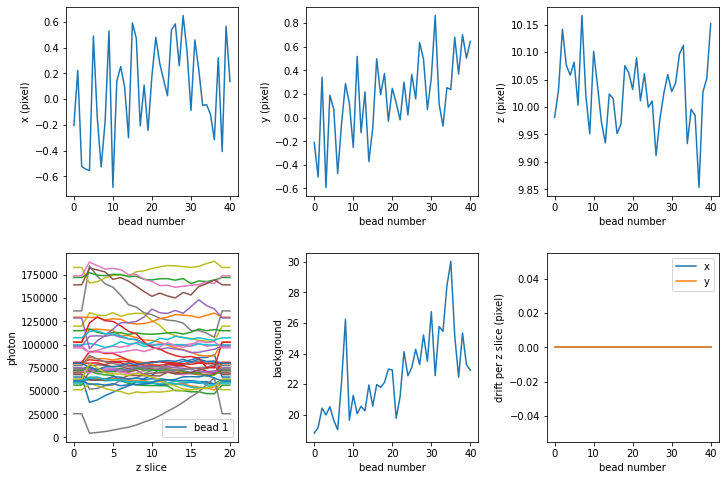

In [146]:
showlearnedparam(f,p)

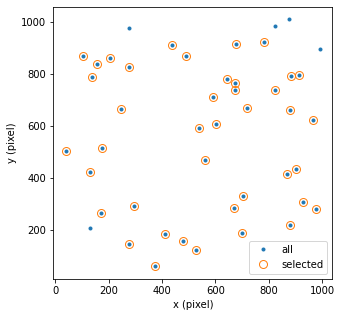

In [147]:
showcoord(f,p)

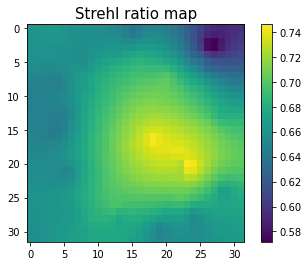

In [148]:
strehlratio = L.calstrehlratio(f)

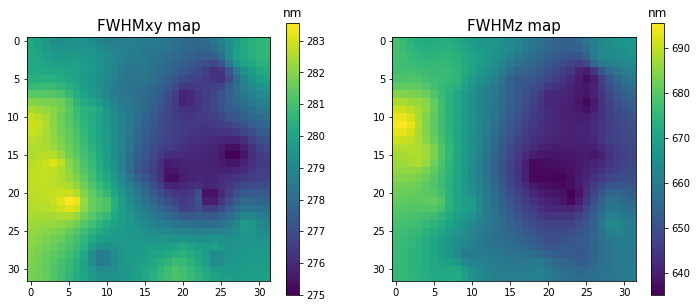

In [149]:
fwhmx,fwhmy,fwhmz = L.calfwhm(f)